# Utilizando algoritmo classificador de Random Forest para a previsão de pagamento 

In [1]:
# Importando a biblioteca para a classificação em Random Forest e a biblioteca que irá carregar os dados de treinamento e teste
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
with open("base.pkl", "rb") as df:
    X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(df)

In [8]:
# Verificando o shape dos atributos
X_base_treinamento.shape, X_base_teste.shape


((1500, 3), (500, 3))

In [7]:
y_base_treinamento.shape, y_base_teste.shape

((1500,), (500,))

In [29]:
# Primeiros testes do classificador Random Forest
random_forest = RandomForestClassifier(n_estimators= 85, criterion="entropy", random_state=0)
random_forest.fit(X_base_treinamento, y_base_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=85, random_state=0)

In [30]:
previsao = random_forest.predict(X_base_teste)

In [31]:
# Visualizando a Acurácia do algoritmo
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_base_teste, previsao)

0.984

0.984

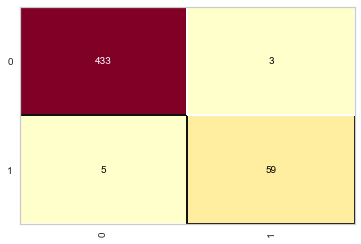

In [32]:
# Visualizando onde está a maior precisão do algoritmo, se no pagante ou não-pagante. Neste caso é nos pagantes, o que não seria o ideal visto que o objetivo do algoritmo seria evitar a perda de dinheiro por emprestimo de um banco. 
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(random_forest)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [16]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



#### O algoritmo consegue identificar corretamente 99% dos dados da classe 0 (Pagantes) com uma precisão de 99% e 92% dos dados da classe 1 (Não-Pagantes) com uma precisão de 95%. 

# FIM